#### Competition Link : 
https://www.kaggle.com/competitions/diamond-price-prediciton-2024

#### Team Name : 'ShAI - B'

## Import Libraries

In [209]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error

## Data Preprocessing

### Getting the Data

In [210]:
# Kaggle
# train_df = pd.read_csv(r"/kaggle/input/diamond-data/train.csv")
# test_df  = pd.read_csv(r"/kaggle/input/diamond-data/test.csv")

# # Jupyter
train_df = pd.read_csv(r"/kaggle/input/diamond1/train (1).csv")
test_df  = pd.read_csv(r"/kaggle/input/diamond1/test (1).csv")

train_df.head(5)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [211]:
"""
price -----------------------------------------------------> $326 : $18,823

carat weight ---------------------------------------------->  0.2 : 5.01
cut quality -----------------------------------------------> (Fair, Good, Very Good, Premium, Ideal)
color 'diamond colour' ------------------------------------> from J (worst) to D (best)
                                                                  d e f g h i j
                                                                  6 5 4 3 2 1 0
clarity "how clear the diamond is" ------------------------> (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x 'length' ------------------------------------------------> 0 : 10.74 mm
y 'width'  ------------------------------------------------> 0 : 58.90 mm
z 'depth'  ------------------------------------------------> 0 : 31.80 mm

depth 'total depth percentage' ----------------------------> 43 : 79 (%)
       = z / mean(x, y) = 2 * z / (x + y)
                             
table 'width of top of diamond relative to widest point' --> 43 : 95
"""
""

''

In [212]:
train_df.info()

# test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [213]:
train_df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [214]:
train_df.describe(include='O')

,cut,color,clarity
count,43152,43152,43152
unique,5,7,8
top,Ideal,G,SI1
freq,17203,9060,10428


In [215]:
train_df["cut"].value_counts()

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64

### Cleaning

In [216]:
train_df.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [217]:
test_df.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [218]:
train_df.duplicated().sum()

0

In [219]:
train_df = train_df.drop(["Id"], axis=1)

In [220]:
train_df.sample()

,carat,cut,color,clarity,depth,table,price,x,y,z
29275,1.52,Very Good,G,SI2,60.9,57.0,8151,7.44,7.5,4.55


### Handling

In [221]:
train_df.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
27991,1.00,Fair,I,I1,65.4,57.0,2112,6.28,6.20,4.08
13564,1.05,Ideal,G,SI1,61.8,56.0,5192,6.50,6.54,4.03
26289,2.07,Good,I,SI1,63.6,58.0,13993,8.09,7.99,5.11
12320,0.40,Premium,F,VS2,61.6,58.0,1080,4.80,4.75,2.94
26060,0.58,Premium,H,VS2,59.7,59.0,1439,5.42,5.33,3.21


In [222]:
len(train_df[(train_df['z'] == 0) | (train_df['y'] == 0) | (train_df['x'] == 0)])

17

In [223]:
train_df = train_df[train_df['z'] != 0 ]

##### Group by is needed!

In [224]:
def handle_test_xyz(col, df="test_df"):
    
    sub_test_df = test_df[test_df[col] == 0]
    
    
    print("BEFORE : \n", sub_test_df[col], "\n\n")
    
    for ID in sub_test_df["Id"]:
        carat_ = float(sub_test_df[sub_test_df["Id"] == ID]["carat"])
        
        print("carat_", carat_)
        
        carat_min = carat_ - 0.1
        carat_max = carat_ + 0.1
        
        sub_train_df = train_df[(train_df["carat"] >= carat_min) & (train_df["carat"] <= carat_max) ]
        
        test_df.loc[test_df["Id"] == ID, col] = sub_train_df[col].mean()
        sub_test_df.loc[sub_test_df["Id"] == ID, col] = sub_train_df[col].mean()
        
    print("AFTER : \n", sub_test_df[col])

In [225]:
test_df[['x', 'y', 'z']] = test_df[['x', 'y', 'z']].replace(0, np.nan)

In [226]:
# print(len(test_df[(test_df['z'] == 0) | (test_df['y'] == 0) | (test_df['x'] == 0)]))

# # x, y, z Will be replaced with vol, af vol == 0, then handle it with the mean of carat weight in specific range (c-0.2, c+0.2)

# test_df['x'].replace({0 : train_df['x'].mean()}, inplace=True)
# test_df['y'].replace({0 : train_df['y'].mean()}, inplace=True)
# test_df['z'].replace({0 : train_df['z'].mean()}, inplace=True)

In [227]:
# train_df[(train_df["carat"] >= 1.1) & (train_df["carat"] <= 1.3) ]

In [228]:
# handle_test_xyz("x")

In [229]:
# handle_test_xyz("y")

In [230]:
# handle_test_xyz("z")

In [231]:
test_IDs = test_df["Id"]
test_df  = test_df.drop(["Id"], axis=1)

In [232]:
train_df_copy = train_df.copy()

In [233]:
train_df["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [234]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_df['cut'] = label_encoder.fit_transform(train_df['cut'])
test_df['cut'] = label_encoder.fit_transform(test_df['cut'])

In [235]:
train_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,2,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,3,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,2,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,2,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,3,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [236]:
train_df["color"].unique()

array(['I', 'G', 'F', 'H', 'D', 'E', 'J'], dtype=object)

In [237]:
train_df['color'] = label_encoder.fit_transform(train_df['color'])
test_df['color'] = label_encoder.fit_transform(test_df['color'])

In [238]:
train_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,2,5,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,3,3,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,2,2,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,2,3,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,3,4,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [239]:
train_df["clarity"].unique()

array(['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

In [240]:
train_df['clarity'] = label_encoder.fit_transform(train_df['clarity'])
test_df['clarity'] = label_encoder.fit_transform(test_df['clarity'])

In [241]:
train_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
3,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50


In [242]:
# train_df["depth"] = 2 * train_df["z"] / (train_df["x"] + train_df["y"]) * 100

# test_df["depth"]  = 2 * test_df["z"] / (test_df["x"] + test_df["y"]) * 100

In [243]:
train_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
3,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50


In [244]:
import numpy as np
from sklearn.impute import KNNImputer

# Initialize KNNImputer with the desired number of neighbors
knn_imputer = KNNImputer(n_neighbors=5)  # Adjust the number of neighbors as needed

# Impute missing values using KNN imputation
test_imputed = knn_imputer.fit_transform(test_df)

# Convert the imputed array back to a DataFrame
test_imputed_df = pd.DataFrame(test_imputed, columns=test_df.columns)

# Now test_imputed_df contains the test data with missing values imputed using KNN imputation


In [245]:
len(test_imputed_df[(test_imputed_df['z'] == 0) | (test_imputed_df['y'] == 0) | (test_imputed_df['x'] == 0)])

0

## Data Visualization

In [246]:
# cut ###########

train_df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.019968,0.290394,-0.212648,0.023989,0.182861,0.921872,0.977923,0.948733,0.957294
cut,0.019968,1.000000,-0.000078,0.032907,-0.194146,0.157553,0.042329,0.024137,0.029306,0.003946
color,0.290394,-0.000078,1.000000,-0.026546,0.045466,0.024896,0.171640,0.269384,0.261048,0.267462
clarity,-0.212648,0.032907,-0.026546,1.000000,-0.049567,-0.087023,-0.069307,-0.224364,-0.214745,-0.223306
depth,0.023989,-0.194146,0.045466,-0.049567,1.000000,-0.302684,-0.013225,-0.029508,-0.033253,0.090595
table,0.182861,0.157553,0.024896,-0.087023,-0.302684,1.000000,0.128571,0.198068,0.185019,0.152507
price,0.921872,0.042329,0.171640,-0.069307,-0.013225,0.128571,1.000000,0.887172,0.862936,0.864861
x,0.977923,0.024137,0.269384,-0.224364,-0.029508,0.198068,0.887172,1.000000,0.969251,0.971492
y,0.948733,0.029306,0.261048,-0.214745,-0.033253,0.185019,0.862936,0.969251,1.000000,0.948567
z,0.957294,0.003946,0.267462,-0.223306,0.090595,0.152507,0.864861,0.971492,0.948567,1.000000


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'color'}>],
       [<Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

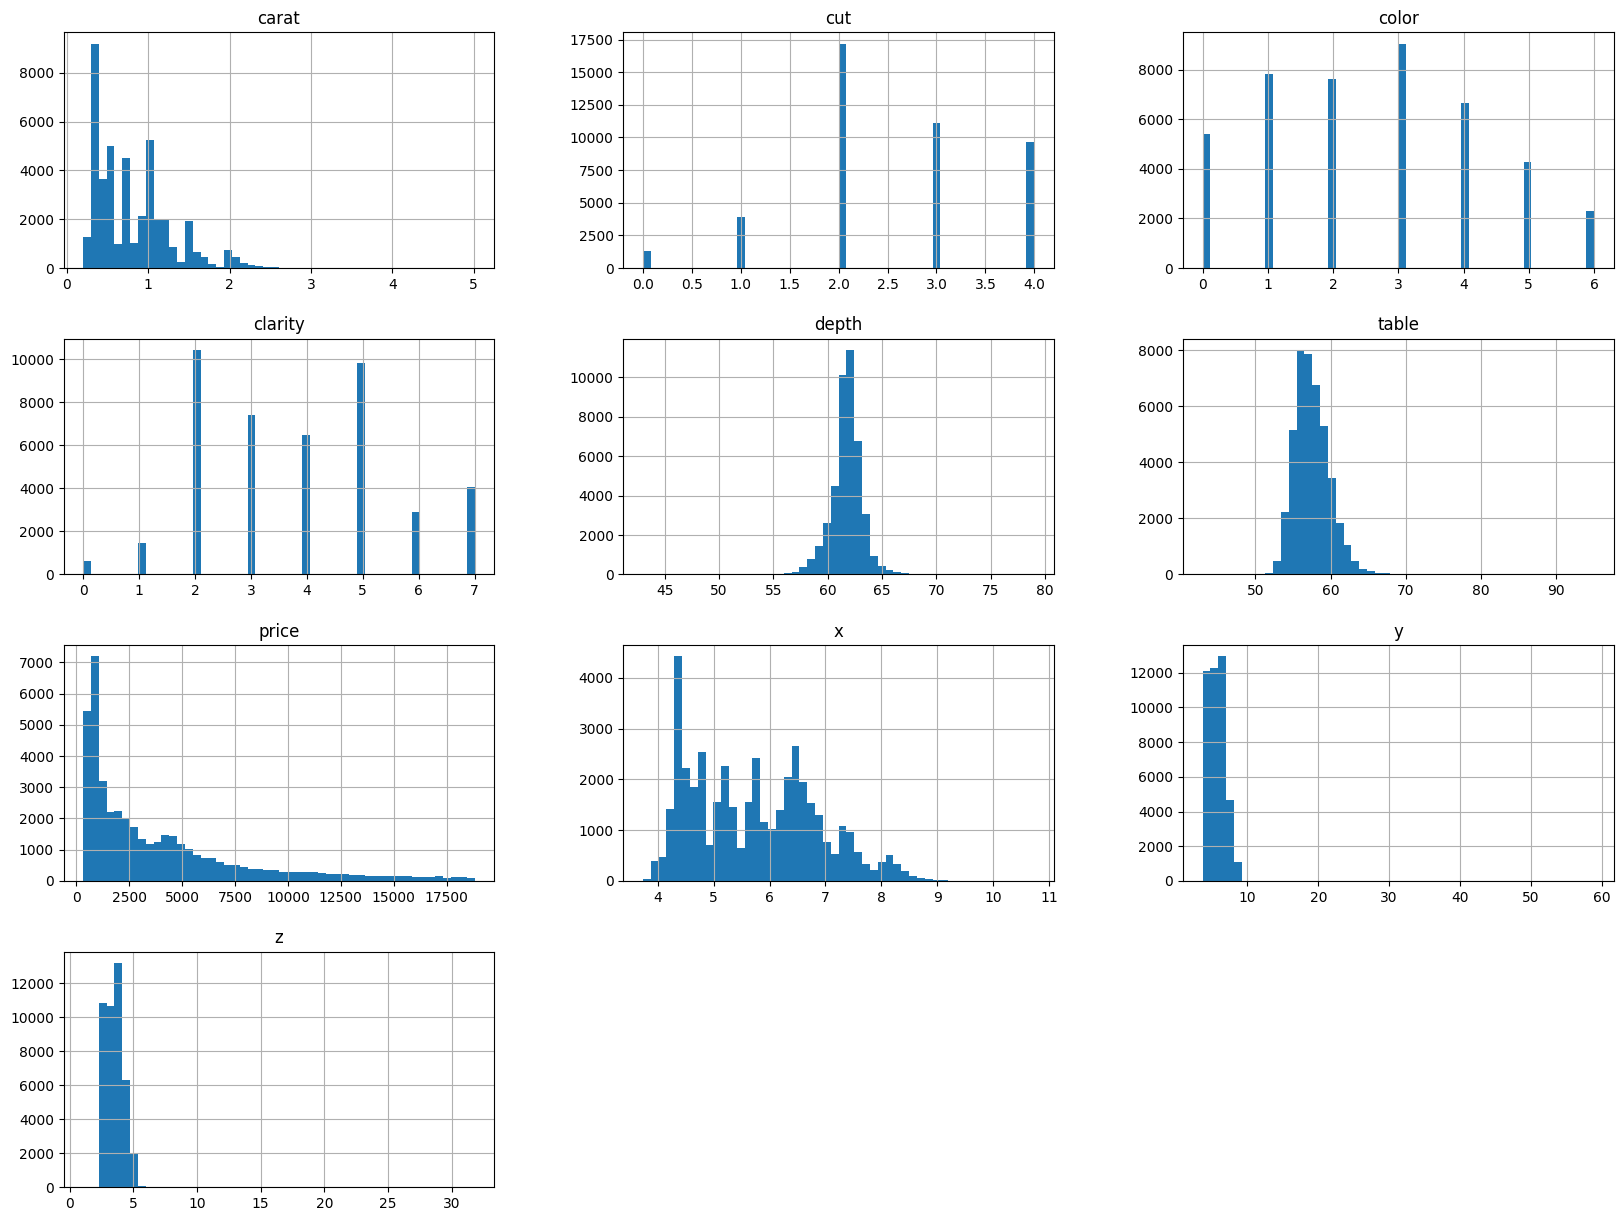

In [247]:
train_df.hist(figsize=(20, 15), bins=50)

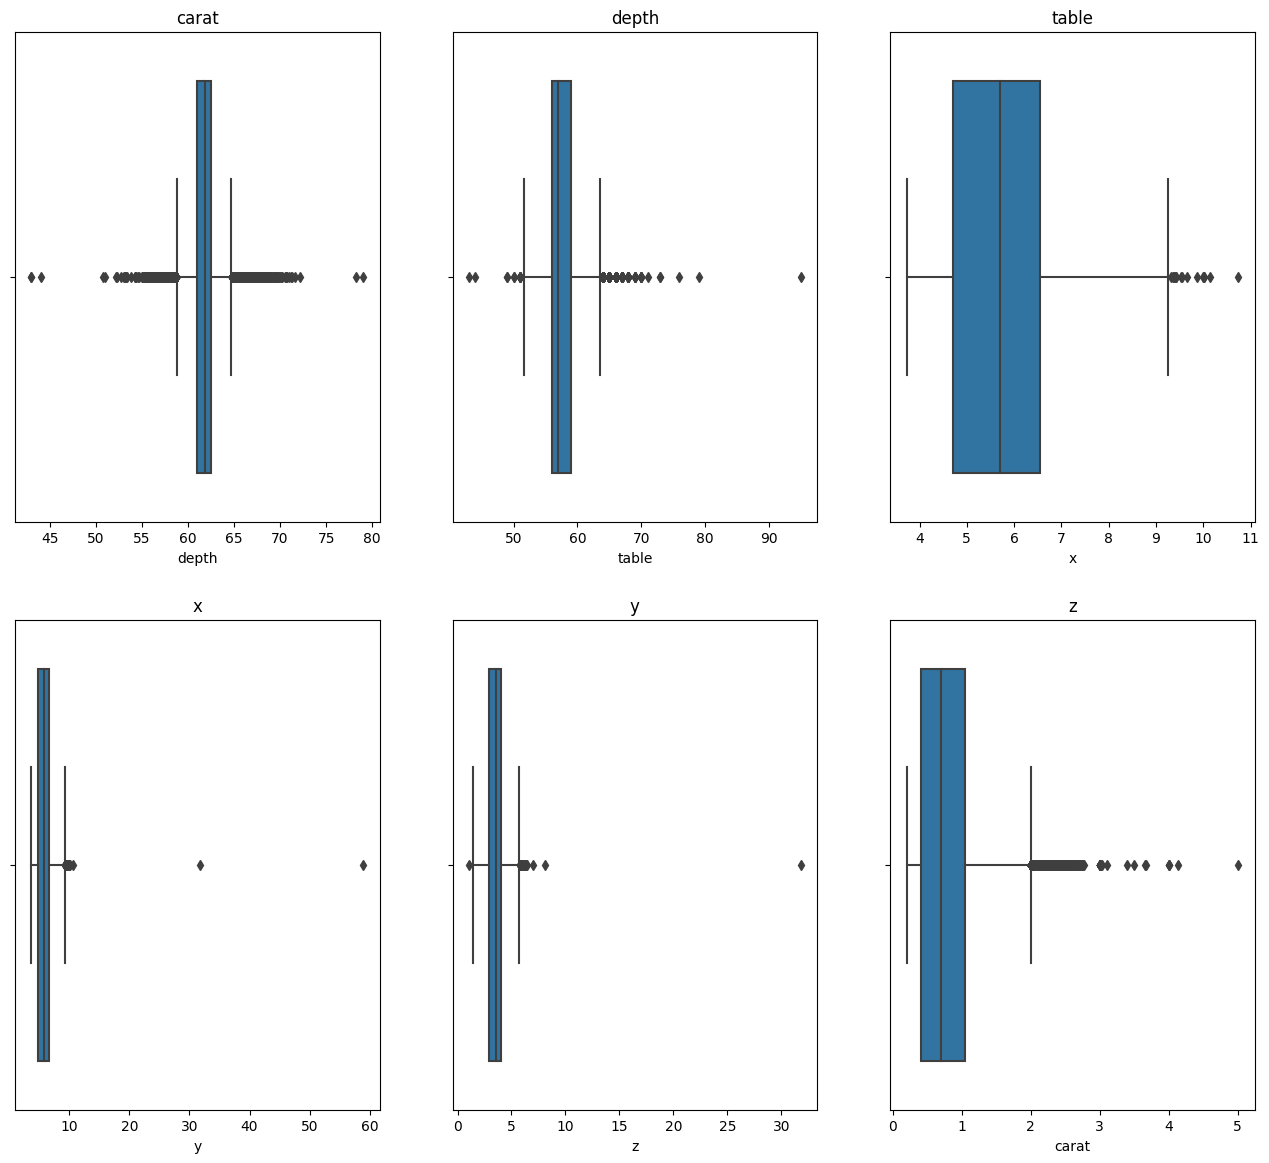

In [248]:
fig, axes = plt.subplots(2, 3, figsize=(16, 14))
for i, cols in enumerate(["carat", "depth", "table", "x", "y", "z"]):

#     plt.boxplot(train_df[cols])
    sns.boxplot(data=train_df, x=cols)
    plt.subplot(2, 3, i+1)
    plt.title(cols)

plt.show()

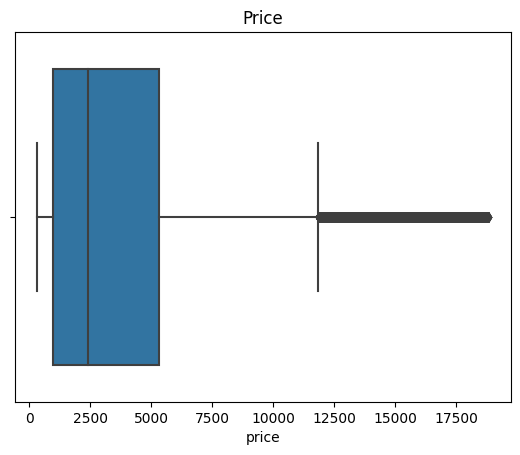

In [249]:
sns.boxplot(data=train_df, x="price")
plt.title("Price")
plt.show()

In [250]:
def get_outliers(col, train_df = train_df):
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    
    return lower_bound, upper_bound,len(iqr_outliers)


for col in train_df.columns:
    lower_bound, upper_bound, outliers = get_outliers(col)
    print(f"Number of outliers detected based on IQR method ({str(col).center(8)}) : ", str(outliers).rjust(4, '0'), f"Lower = {str(round(lower_bound, 3)).ljust(5, '0')}", f"Upper= {str(round(upper_bound, 3)).ljust(5, '0')}")        

Number of outliers detected based on IQR method ( carat  ) :  1498 Lower = -0.56 Upper= 2.000
Number of outliers detected based on IQR method (  cut   ) :  1296 Lower = 0.500 Upper= 4.500
Number of outliers detected based on IQR method ( color  ) :  0000 Lower = -3.50 Upper= 8.500
Number of outliers detected based on IQR method (clarity ) :  0000 Lower = -2.50 Upper= 9.500
Number of outliers detected based on IQR method ( depth  ) :  2054 Lower = 58.75 Upper= 64.75
Number of outliers detected based on IQR method ( table  ) :  0471 Lower = 51.50 Upper= 63.50
Number of outliers detected based on IQR method ( price  ) :  2838 Lower = -5599.0 Upper= 11857.0
Number of outliers detected based on IQR method (   x    ) :  0016 Lower = 1.965 Upper= 9.285
Number of outliers detected based on IQR method (   y    ) :  0015 Lower = 1.990 Upper= 9.270
Number of outliers detected based on IQR method (   z    ) :  0022 Lower = 1.215 Upper= 5.735


### Outliers Handling

<Axes: xlabel='carat', ylabel='price'>

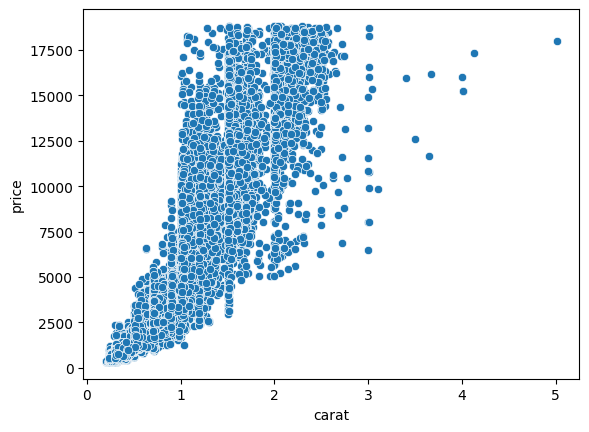

In [251]:
sns.scatterplot(x=train_df["carat"], y=train_df["price"])

In [252]:
len(train_df[train_df["carat"] > 2]) # IQR Function

1498

In [253]:
len(train_df[train_df["carat"] > 3]) # Visualization

21

In [254]:
# # Handling CODE
# train_df = train_df[train_df["carat"] <= 2 ] # 3
# # len(train_df[train_df["carat"] > 2]) # Visualization

In [255]:
len(train_df)

43135

#### 

<Axes: xlabel='depth', ylabel='price'>

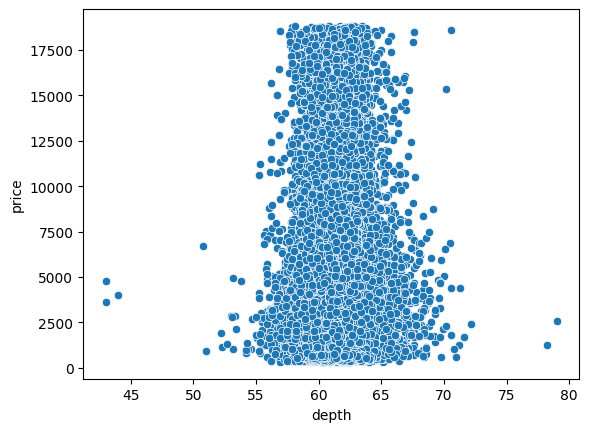

In [256]:
sns.scatterplot(x=train_df["depth"], y=train_df["price"])

In [257]:
len(train_df[(train_df["depth"] < 58.75) | (train_df["depth"] > 64.75)]) # IQR Function

2054

In [258]:
len(train_df[(train_df["depth"] < 50) & (train_df["depth"] > 95)]) # Visulization

0

In [259]:
# # Handling CODE

# train_df = train_df[(train_df["depth"] >= 58.75) & (train_df["depth"] <= 64.75)] # Visulization

In [260]:
len(train_df[(train_df["depth"] < 50) | (train_df["depth"] > 95)]) # Visulization

3

##### 

<Axes: xlabel='table', ylabel='price'>

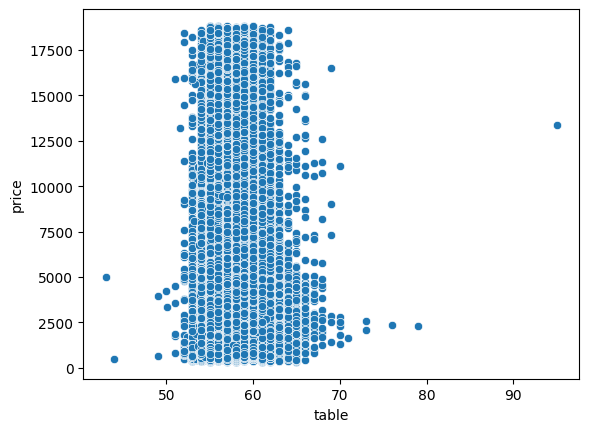

In [261]:
sns.scatterplot(x=train_df["table"], y=train_df["price"])

In [262]:
len(train_df[(train_df["table"] < 51.5) | (train_df["table"] > 63.5)]) # IQR Function

471

In [263]:
len(train_df[(train_df["table"] < 50) | (train_df["table"] > 70)]) # Visulization

10

In [264]:
# # Handling CODE

# train_df = train_df[(train_df["table"] >= 51.5) & (train_df["table"] <= 63.5)] # Visulization

In [265]:
len(train_df[(train_df["table"] < 50) | (train_df["table"] > 70)]) # Visulization

10

#### 

In [266]:
# train_df = train_df[train_df["price"] <= 11857] # Visulization

In [267]:
# q1 = train_df.quantile(0.25)
# q3 = train_df.quantile(0.75)
# IQR = q3 - q1

 
# train_df = train_df[~((train_df < (q1 - 1.5 * IQR)) | (train_df > (q3 + 1.5 * IQR))).any(axis=1)]

In [268]:
# from scipy.stats import boxcox
# # Select only float features
# float_features = train_df.select_dtypes(include=['float']).columns
# # Add a small constant to handle zero values
# train_df[float_features] = train_df[float_features] + 0.001
# # Apply Box-Cox transformation to each float feature
# for feature in float_features:
#     train_df[feature], _ = boxcox(train_df[feature])

In [269]:
# train_df['price'], _ = boxcox(train_df['price'])

In [270]:
train_df[['carat', 'depth','table','price','x','y','z']] = train_df[['carat', 'depth','table','price','x','y','z']].apply(lambda x: np.log1p(x+0.01) if x.name in ['carat', 'depth','table','price','x','y','z'] else x)

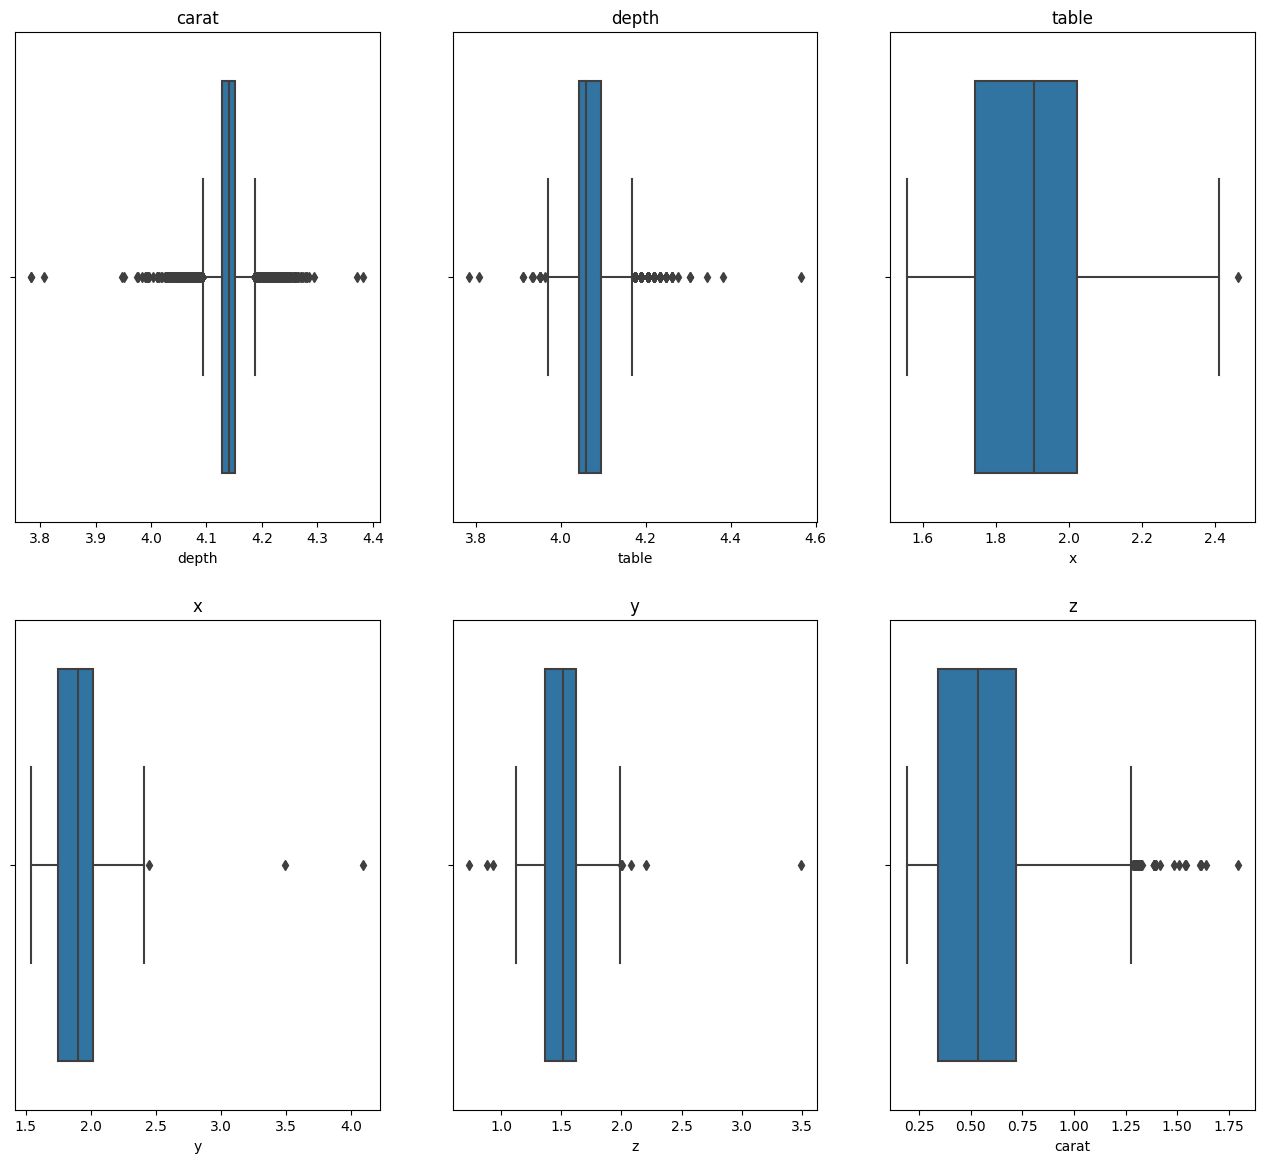

In [271]:
fig, axes = plt.subplots(2, 3, figsize=(16, 14))
for i, cols in enumerate(["carat", "depth", "table", "x", "y", "z"]):

#     plt.boxplot(train_df[cols])
    sns.boxplot(data=train_df, x=cols)
    plt.subplot(2, 3, i+1)
    plt.title(cols)

plt.show()

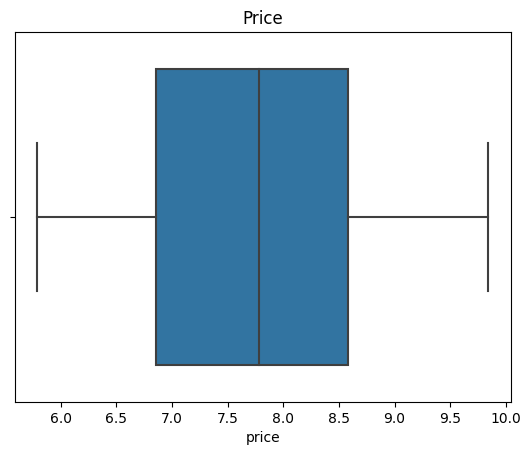

In [272]:
sns.boxplot(data=train_df, x="price")
plt.title("Price")
plt.show()

In [273]:
train_df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,0.561060,2.555164,2.593972,3.831645,4.139014,4.067761,7.786195,1.894752,1.895253,1.503648
std,0.243365,1.027043,1.701973,1.724911,0.022958,0.037734,1.014027,0.164278,0.163624,0.150666
min,0.190620,0.000000,0.000000,0.000000,3.784417,3.784417,5.789991,1.556037,1.545433,0.732368
25%,0.343590,2.000000,1.000000,2.000000,4.127296,4.043227,6.854365,1.743969,1.745716,1.366092
50%,0.536493,2.000000,3.000000,4.000000,4.140114,4.060615,7.783645,1.903599,1.905088,1.512927
75%,0.717840,3.000000,4.000000,5.000000,4.151197,4.094511,8.577726,2.021548,2.021548,1.619388
max,1.795087,4.000000,6.000000,7.000000,4.382152,4.564452,9.842888,2.463853,4.092843,3.490733


#### Color

In [274]:
# # Color

# fig, axes = plt.subplots(1, 3, figsize=(16,18))

# #plot 1
# axes[0].pie(train_df_copy['cut'].value_counts(),labels=train_df_copy['cut'].value_counts().index,autopct='%1.1f%%', colors=sns.color_palette("husl"), startangle=90, shadow=True)
# axes[0].set_title('Cut')
# #plot 2  
               
# # c2 = [ '#FFF1C9', '#F7B7A3', '#EA5F89', '#8481DD', '#57167E' ,'#009596']
# axes[1].pie(train_df_copy['color'].value_counts(), labels=train_df_copy['color'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette("husl"), startangle=90, shadow=True)
# axes[1].set_title('Color')

# # plot 3
# c3 = sns.color_palette("flare")
# axes[2].pie(train_df_copy['clarity'].value_counts(),labels=train_df_copy['clarity'].value_counts().index,autopct='%1.1f%%', colors=sns.color_palette("Paired"))
# axes[2].set_title('Clarity')

<Axes: xlabel='cut', ylabel='count'>

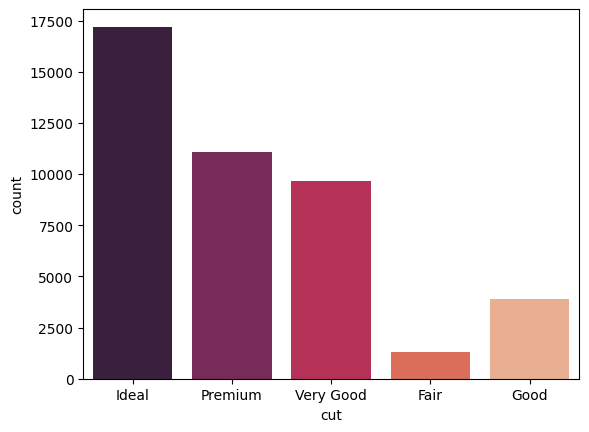

In [275]:
sns.countplot(data=train_df_copy, x="cut", palette='rocket')

<Axes: xlabel='color', ylabel='count'>

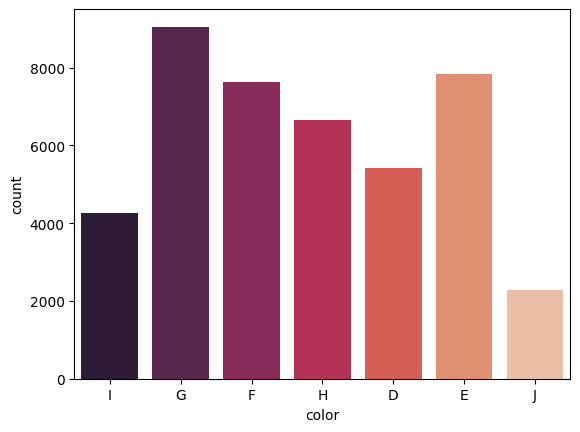

In [276]:
sns.countplot(data=train_df_copy, x="color", palette='rocket')

<Axes: xlabel='clarity', ylabel='count'>

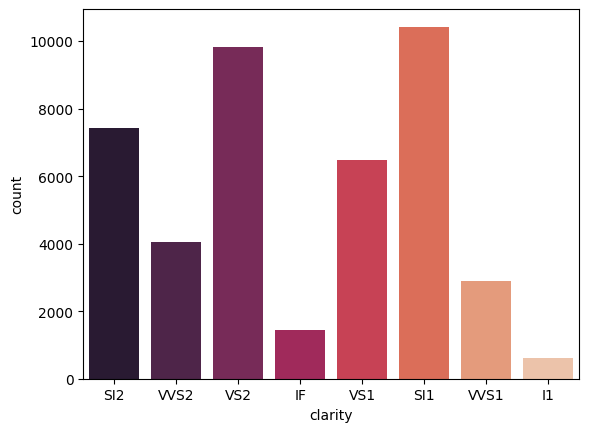

In [277]:
sns.countplot(data=train_df_copy, x="clarity", palette='rocket')

In [278]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# sns.countplot(data=train_df_copy["cut"], ax=axes[0])
# axes[0].set_title('Cut')

# sns.countplot(data=train_df_copy["color"], ax=axes[1])
# axes[1].set_title('Color')

# sns.countplot(data=train_df_copy["clarity"], ax=axes[2])
# axes[2].set_title('Clarity')

# plt.tight_layout()
# plt.show()

<Axes: >

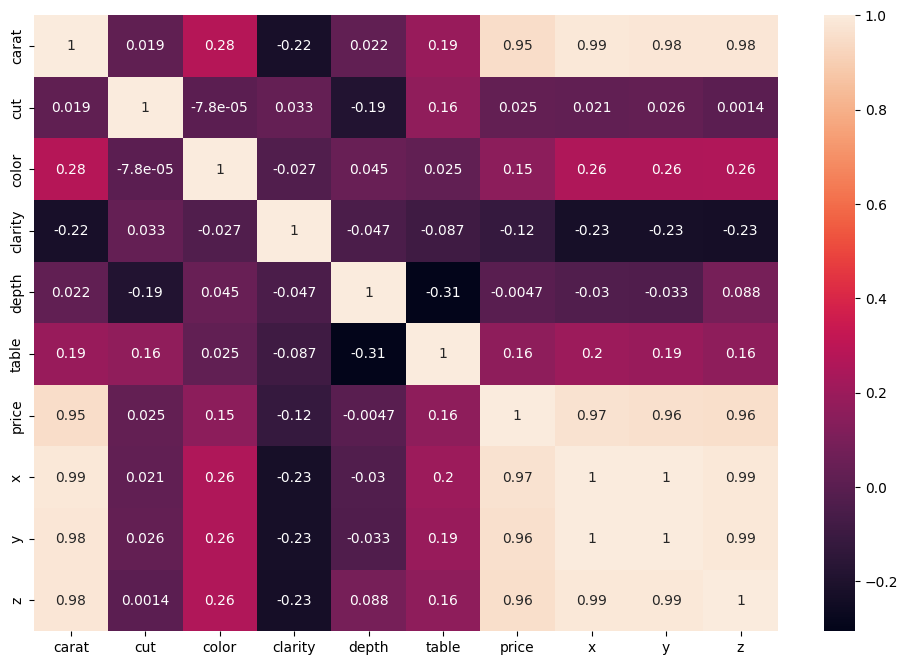

In [279]:
plt.subplots(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True)

In [280]:
# plt.figure(figsize=(8,5))

# plt.title('Gas Prices over Time (in USD)', fontdict={'fontweight':'bold', 'fontsize': 18})

# plt.plot(train_df["price"], train_df["x"], 'b.-', label='Length')
# plt.plot(train_df["price"], train_df["y"], 'r.-', label='Width')
# plt.plot(train_df["price"], train_df["z"], 'g.-', label='Depth')


# # plt.xticks(gas.Year[::3].tolist()+[2011])

# plt.xlabel('Price')
# plt.ylabel('Dim')

# plt.legend()

# # plt.savefig('Gas_price_figure.png', dpi=300)

# plt.show()

In [281]:
"""
Price:
    Histogram to visualize the distribution of diamond prices.
    Box plot to examine the distribution of prices across different cuts or colors.

Carat:
    Scatter plot to explore the relationship between carat weight and price.
    Box plot to compare carat weights across different cuts or colors.

Cut:
    Bar plot to display the count of diamonds for each cut category.
    Box plot or Violin plot to compare prices across different cut categories.

Color:
    Bar plot to show the count of diamonds for each color category.
    Box plot or Violin plot to compare prices across different color categories.

Clarity: 
    Bar plot to visualize the count of diamonds for each clarity category.
    Box plot or Violin plot to compare prices across different clarity categories.

x, y, z:
    You can create scatter plots or 3D scatter plots to explore the relationship between these dimensions and other variables like price or carat weight.

Depth:
    Histogram to visualize the distribution of depth percentages.
    Scatter plot or regression plot to explore the relationship between depth percentage and price.

Table:
    Histogram to visualize the distribution of table widths.
    Scatter plot or regression plot to explore the relationship between table width and price.
"""
""

''

## Feature Engineering 

In [282]:
train_df["vol"] = train_df["x"] * train_df["y"] * train_df["z"]
train_df['density']=train_df["vol"]+train_df['carat']
train_df.drop(["x", "y", "z"], axis=1, inplace=True)

test_imputed_df["vol"] = test_imputed_df["x"] * test_imputed_df["y"] * test_imputed_df["z"]
test_imputed_df['density']=test_imputed_df["vol"]+test_imputed_df['carat']
test_imputed_df.drop(["x", "y", "z"], axis=1, inplace=True)

In [283]:
train_df.head()

,carat,cut,color,clarity,depth,table,price,vol,density
0,0.727549,2,5,3,4.140114,4.060615,8.359606,6.681174,7.408723
1,0.924259,3,3,7,4.125682,4.077707,9.626746,7.746500,8.670758
2,0.285179,2,2,5,4.132122,4.043227,6.720232,3.760730,4.045909
3,0.431782,2,3,5,4.130516,4.043227,7.363920,4.790007,5.221789
4,0.536493,3,4,7,4.127296,4.060615,7.862116,5.492452,6.028945


In [284]:
test_imputed_df.head()

,carat,cut,color,clarity,depth,table,vol,density
0,0.34,2.0,3.0,7.0,61.1,57.0,55.686400,56.026400
1,0.71,3.0,1.0,5.0,62.7,58.0,116.719456,117.429456
2,0.44,4.0,5.0,4.0,62.8,56.0,71.889720,72.329720
3,0.81,3.0,1.0,3.0,60.1,59.0,134.037855,134.847855
4,0.40,2.0,3.0,6.0,61.2,56.0,66.435840,66.835840


In [285]:
corr_matrix = train_df.corr()
corr_matrix["price"].sort_values(ascending=False)

price      1.000000
vol        0.959719
density    0.959250
carat      0.953561
table      0.162219
color      0.153637
cut        0.025491
depth     -0.004691
clarity   -0.117721
Name: price, dtype: float64

In [182]:
# test_df[test_df["vol"]==0]

In [286]:
test_imputed_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
vol        0
density    0
dtype: int64

## Scaling & Spliting 

In [184]:
y = train_df["price"]
X = train_df.drop(["price"], axis=1)

In [287]:
test_imputed_df.shape

(10788, 8)

In [288]:
scaler = StandardScaler()
scaler.fit(X)

scaled_X = scaler.transform(X)


In [299]:
submission_data = scaler.fit_transform(test_imputed_df)

In [289]:
# custom_range = (0, 1)

# scaler = MinMaxScaler(feature_range=custom_range)

# scaled_X = scaler.fit_transform(X)


# submission_data = scaler.fit_transform(test_df)

In [290]:
pd.DataFrame(scaled_X).describe()

,0,1,2,3,4,5,6,7
count,4.313500e+04,4.313500e+04,4.313500e+04,4.313500e+04,4.313500e+04,4.313500e+04,4.313500e+04,4.313500e+04
mean,-2.800331e-17,-4.702908e-17,4.414639e-17,-8.928113e-17,2.170596e-14,-1.390117e-14,4.470646e-16,1.970115e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.522175e+00,-2.487913e+00,-1.524115e+00,-2.221383e+00,-1.544561e+01,-7.509154e+00,-1.759372e+00,-1.727050e+00
25%,-8.936088e-01,-5.405523e-01,-9.365545e-01,-1.061890e+00,-5.104112e-01,-6.502035e-01,-9.028170e-01,-9.019264e-01
50%,-1.009482e-01,-5.405523e-01,2.385656e-01,9.760335e-02,4.794587e-02,-1.893695e-01,-3.206942e-02,-3.996132e-02
75%,6.442225e-01,4.331281e-01,8.261257e-01,6.773500e-01,5.307052e-01,7.089336e-01,6.975279e-01,6.907032e-01
max,5.070741e+00,1.406808e+00,2.001246e+00,1.836843e+00,1.059067e+01,1.316326e+01,9.567037e+00,8.548025e+00


In [291]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, random_state=42, test_size=0.20)

## Model Selection

In [292]:
"""
                                      * All Regression Models in sklearn *

Linear Models:
    Linear Regression
    Ridge Regression
    Lasso Regression
    ElasticNet Regression

Tree-based Models:
    Decision Trees
    Random Forests                                <------
    Gradient Boosting Machines (GBM)
    AdaBoost
    Extra Trees
    
Support Vector Machines (SVM):
    Support Vector Regressor (SVR)
    
Nearest Neighbors:
    K-Nearest Neighbors Regressor (KNeighborsRegressor)

Gaussian Process Regressor:
    Gaussian Process Regressor (GaussianProcessRegressor)

Ensemble Methods:
    Voting Regressor
    Bagging Regressor
    Stacking Regressor
    
Neural Network Models:
    Multi-layer Perceptron Regressor (MLPRegressor)

Other Models:
    RANSACRegressor
    
    
    ---------------------------------------------------------------------------------------------------------------------
                      Which one is best for use with `44k` rows and about `10` columns (3 categorical columns)
    
The best regression model to use would likely be `Random Forest Regression`

Here's why Random Forest Regression is a strong candidate:

    * Scalability: Random Forests can handle large datasets efficiently, making them suitable for datasets with 44k rows.
    * Feature Importance: Random Forests provide feature importance scores, which can help identify the most influential features in predicting the target variable.
    * Non-linearity: Random Forests can capture non-linear relationships between features and the target variable effectively, which is beneficial when dealing with datasets with complex relationships.
    * Categorical Features: Random Forests can handle categorical features without requiring extensive preprocessing, making them convenient for datasets with categorical columns.
    * Robustness: Random Forests are robust to outliers and noise in the data, reducing the risk of overfitting.

"""
""

''

## Model Training

#### 1-  Linear Regression

In [293]:
from sklearn.linear_model import LinearRegression

linearReg_model = LinearRegression()
linearReg_model.fit(X_train, y_train)

linearReg_y_pred = linearReg_model.predict(X_test)
linearReg_RMSE = np.sqrt(mean_squared_error(y_test, linearReg_y_pred))

print("Linear Regression RMSE:", linearReg_RMSE)

for index, (real_value, predicted_value) in zip(range(10), zip(y_test, linearReg_y_pred)):
    print(f"Real value is {str(round(real_value)).rjust(5)} | The predicted value is {str(round(predicted_value)).rjust(5)}")
    
# 1530.215786802567

Linear Regression RMSE: 0.26139294307455463
Real value is     6 | The predicted value is     7
Real value is     9 | The predicted value is     9
Real value is     6 | The predicted value is     6
Real value is     9 | The predicted value is     9
Real value is     9 | The predicted value is     9
Real value is     9 | The predicted value is     9
Real value is     8 | The predicted value is     8
Real value is     6 | The predicted value is     7
Real value is     7 | The predicted value is     7
Real value is     8 | The predicted value is     8


#### 2- Gradient Boosting

In [294]:
from sklearn.ensemble import GradientBoostingRegressor

gradientBoosting_model = GradientBoostingRegressor(random_state=42)
gradientBoosting_model.fit(X_train, y_train)

gradientBoosting_y_pred = gradientBoosting_model.predict(X_test)
gradientBoosting_RMSE = np.sqrt(mean_squared_error(y_test, gradientBoosting_y_pred))

print("Linear Regression RMSE:", gradientBoosting_RMSE)

for index, (real_value, predicted_value) in zip(range(10), zip(y_test, gradientBoosting_y_pred)):
    print(f"Real value is {str(round(real_value)).rjust(5)} | The predicted value is {str(round(predicted_value)).rjust(5)}")

Linear Regression RMSE: 0.11732224367344171
Real value is     6 | The predicted value is     6
Real value is     9 | The predicted value is     9
Real value is     6 | The predicted value is     6
Real value is     9 | The predicted value is     9
Real value is     9 | The predicted value is     9
Real value is     9 | The predicted value is     9
Real value is     8 | The predicted value is     8
Real value is     6 | The predicted value is     6
Real value is     7 | The predicted value is     7
Real value is     8 | The predicted value is     8


#### 3-  Decision Tree

In [295]:
from sklearn.tree import DecisionTreeRegressor

decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(X_train, y_train)

decisionTree_y_pred = decisionTree_model.predict(X_test)
decisionTree_RMSE = np.sqrt(mean_squared_error(y_test, decisionTree_y_pred))

print("Decision Tree RMSE:", decisionTree_RMSE)

for index, (real_value, predicted_value) in zip(range(10), zip(y_test, decisionTree_y_pred)):    
    print(f"Real value is {str(round(real_value)).rjust(5)} | The predicted value is {str(round(predicted_value)).rjust(5)}")

# 722.8128493054971

Decision Tree RMSE: 0.14296738346877813
Real value is     6 | The predicted value is     6
Real value is     9 | The predicted value is     9
Real value is     6 | The predicted value is     7
Real value is     9 | The predicted value is     9
Real value is     9 | The predicted value is     9
Real value is     9 | The predicted value is     9
Real value is     8 | The predicted value is     8
Real value is     6 | The predicted value is     7
Real value is     7 | The predicted value is     7
Real value is     8 | The predicted value is     9


#### 4-  Random Forest

In [296]:
from sklearn.ensemble import RandomForestRegressor

randomForest_model = RandomForestRegressor(n_estimators=100, random_state=42)
randomForest_model.fit(X_train, y_train)

randomForest_y_pred = randomForest_model.predict(X_test)
randomForest_RMSE = np.sqrt(mean_squared_error(y_test, randomForest_y_pred))

print("Random Forest RMSE:", randomForest_RMSE)

for index, (real_value, predicted_value) in zip(range(1, 28), zip(y_test, randomForest_y_pred)):        
    print(f"Real value is {str(round(real_value)).rjust(5)} | The predicted value is {str(round(predicted_value)).rjust(5)}")

# 536.4054829024946

Random Forest RMSE: 0.11086888368316765
Real value is     6 | The predicted value is     6
Real value is     9 | The predicted value is     9
Real value is     6 | The predicted value is     6
Real value is     9 | The predicted value is     9
Real value is     9 | The predicted value is     9
Real value is     9 | The predicted value is     9
Real value is     8 | The predicted value is     8
Real value is     6 | The predicted value is     6
Real value is     7 | The predicted value is     7
Real value is     8 | The predicted value is     8
Real value is     9 | The predicted value is     9
Real value is     8 | The predicted value is     7
Real value is     9 | The predicted value is     9
Real value is     8 | The predicted value is     8
Real value is     9 | The predicted value is     9
Real value is     6 | The predicted value is     6
Real value is     7 | The predicted value is     7
Real value is     6 | The predicted value is     6
Real value is     8 | The predicted value 

In [297]:
from sklearn.metrics import r2_score
r2_score(y_test,randomForest_y_pred)

0.9881515110347712

In [196]:
import tensorflow
from keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
from keras.models import Sequential

model = Sequential()

#Imput Layer 
model.add(Dense(10,activation='relu',input_dim=8, kernel_regularizer=l1(0.01)))
#Hidden Layers 
model.add(Dense(10,activation='relu'))
#OutputLayer
model.add(Dense(1,activation='linear'))

#Compile
model.compile(loss='huber',optimizer='Adam')

#Fit 
history = model.fit(X_train,y_train,epochs=20,validation_split=0.2)
y_pred = model.predict(X_test)

2024-05-14 05:20:15.074617: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 05:20:15.074746: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 05:20:15.205256: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.6699 - val_loss: 0.2713
Epoch 2/20
863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2215 - val_loss: 0.1274
Epoch 3/20
863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1105 - val_loss: 0.0663
Epoch 4/20
863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0553 - val_loss: 0.0362
Epoch 5/20
863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0347 - val_loss: 0.0311
Epoch 6/20
863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0299 - val_loss: 0.0284
Epoch 7/20
863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0290 - val_loss: 0.0302
Epoch 8/20
863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0277 - val_loss: 0.0270
Epoch 9/20
863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0273 - val_loss: 0.0276
Epoch 10/20
863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0263 - val_loss: 0.0261
Epoch 11/20
863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0271 - val_loss: 0.0273
Epoch 12/20
863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.

In [197]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9622700946313901

## Model Evaluation

In [199]:
forest_model = RandomForestRegressor()
forest_scores = cross_val_score(forest_model, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
forest_rmse_scores = np.sqrt(np.abs(forest_scores))

In [200]:
forest_rmse_scores

array([0.11450022, 0.11151691, 0.11258115, 0.1115934 , 0.10825329])

In [206]:
pd.DataFrame(y_train).isna().sum()

price    0
dtype: int64

In [174]:
# for score in forest_rmse_scores:
#     print(round(score, 3))

## Model Fine-Tune 

In [175]:

# param_grid_rf = {
#     'n_estimators': [50, 100, 200, 300],
#     'max_depth': [None, 5, 10, 20],

#     'min_samples_split': [2, 3, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 5, 6, 7]
# }


In [207]:
# param_grid = [
#               {'n_estimators': [30, 40, 50, 70, 100, 200], 'max_features':[2, 4, 6, 7]},
#               {'max_features':[2, 3, 4],'n_estimators':[3, 10]}
# ]


# forest_reg1 = RandomForestRegressor(random_state = 42)

# grid_search1 = GridSearchCV(forest_reg1, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
# grid_search1.fit(X_train, y_train)

In [177]:
# param_grid_gb = {
#     'n_estimators': [50, 100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 3, 5],
#     'min_samples_leaf': [1, 2, 4]
# }

# gradientBoosting_model2 = GradientBoostingRegressor(random_state=42)

# grid_search2 = GridSearchCV(gradientBoosting_model2, param_grid_rf, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
# grid_search2.fit(X_train, y_train)

In [178]:
# cvres = grid_search1.cv_results_

# for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
#     print(round(np.sqrt(np.abs(mean_score)), 2), params)

In [179]:
# feature_importances = grid_search1.best_estimator_.feature_importances_
# feature_importances

In [180]:
# # Plotting feature importances
# plt.figure(figsize=(10, 6))
# plt.bar(X.columns, feature_importances)
# plt.xlabel('Features')
# plt.ylabel('Feature Importance')
# plt.show()

In [181]:
# best_model = grid_search1.best_estimator_
# joblib.dump(best_model, 'RandomForest_TheBest.pkl')

In [182]:
# best_predictions = best_model.predict(X_test)
# mse = mean_squared_error(y_test, best_predictions)
# rmse = np.sqrt(np.abs(mse))
# rmse

In [183]:
# np.sqrt(abs(mean_squared_error(y_test, best_model.predict(X_test))))

## Final Prediction

In [300]:
best_predictions2 = randomForest_model.predict(submission_data)

In [301]:
# samples_num = 1

# for index, (row_data, predicted_value) in zip(range(samples_num), zip(submission_data, best_predictions2)):
#     data = scaler.inverse_transform([row_data])
    
    
#     print(f"{str(index).rjust(len(str(index)), '0')} - Row Data : {data} \n    Predicted Value : {str(int(predicted_value)).rjust(5)}")

In [302]:
for index, pred in zip(range(1, 28), best_predictions2):
    print(f"{index} - " ,pred)

1 -  6.852697452692876
2 -  7.721572579434289
3 -  6.838986173662396
4 -  7.797286364371535
5 -  7.102015104863174
6 -  9.18714748270007
7 -  8.534549535123311
8 -  8.355166052172544
9 -  7.389583877920206
10 -  6.763080562155096
11 -  7.327440510572827
12 -  7.276244993431594
13 -  8.12955079396043
14 -  8.53258694010415
15 -  7.180702330488741
16 -  7.584828259179459
17 -  7.489106040072877
18 -  9.52502811148905
19 -  8.231516942509794
20 -  8.353170504748777
21 -  7.419505159197627
22 -  6.945751088297863
23 -  6.857636880345858
24 -  7.067382702412389
25 -  8.751939824932418
26 -  7.906801494130157
27 -  9.467149917158984


In [303]:
for index, pred in zip(range(1, 28), best_predictions2):
    print(f"{index} - " ,np.exp(pred))


1 -  946.4304178119729
2 -  2256.5053257236464
3 -  933.5422051244113
4 -  2433.988051095099
5 -  1214.411777577675
6 -  9770.73998499188
7 -  5087.539201233424
8 -  4252.090622611624
9 -  1619.0322576700758
10 -  865.3037160755208
11 -  1521.48256559016
12 -  1445.5497722770158
13 -  3393.274943133903
14 -  5077.564213769437
15 -  1313.830677628059
16 -  1968.1086003207088
17 -  1788.4525720659142
18 -  13698.314999147771
19 -  3757.529387081527
20 -  4243.613834853059
21 -  1668.2078061768543
22 -  1038.7268798929758
23 -  951.1168069010811
24 -  1173.073729776278
25 -  6322.941619212585
26 -  2715.6904084526745
27 -  12927.988835359558


In [ ]:
"""
1 -  986.27
2 -  2877.73
3 -  876.51
4 -  2719.93
5 -  1073.95
6 -  11091.41
7 -  5920.16
8 -  4385.69
9 -  2154.38
10 -  841.0
11 -  1699.73
12 -  1480.01
13 -  4175.6
14 -  5212.63
15 -  1185.67
16 -  2460.68
17 -  2367.46
18 -  13243.64
19 -  4666.29
20 -  5179.32
21 -  1928.31
22 -  1021.42
23 -  847.8276666666666
24 -  1300.83
25 -  6309.79
26 -  3067.32
27 -  12891.0
"""
""

## Submission Dataset

In [ ]:
# Dataset contains 2 columns | 1st one is the ID, 2nd one is the prediction

data_for_sub = pd.DataFrame({"ID":test_IDs, "price":best_predictions2})
data_for_sub.to_csv("Submission4.csv", index=False)

In [ ]:
# train_df.sample()